# TREADS App Sentimental Analysis and Classification

In [55]:
#Import the necessary Dependables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
#Load the Data

df=pd.read_csv('/content/threads_reviews.csv')
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [57]:
print('Shape of Dataset', df.shape)

Shape of Dataset (32910, 4)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


#Data Cleaning



*   Variable 'review_date' is in object Dtype, should be
    converted into DateTime format




In [59]:
# Object to DataTime conversion

df['review_date']=pd.to_datetime(df['review_date']).dt.date
df['review_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32910 entries, 0 to 32909
Series name: review_date
Non-Null Count  Dtype 
--------------  ----- 
32910 non-null  object
dtypes: object(1)
memory usage: 257.2+ KB


In [60]:
#Checking for Null Values

df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

No Null values in the dataset

In [61]:
#Checking for any duplicate rows

df.duplicated().sum()

3761

In [62]:
#Dropping the Duplicate rows

df=df.drop_duplicates(ignore_index=True)
df.duplicated().sum()

0

#EDA

In [63]:
# The Reviews are collected between:

start_date=df['review_date'].min()
last_date=df['review_date'].max()

print('Review_start_date:', start_date)

print('Review_end_date:', last_date)

Review_start_date: 2023-07-05
Review_end_date: 2023-07-25


* The Reviews are collected for span of 30 days period.

Google Play    26516
App Store       2633
Name: source, dtype: int64


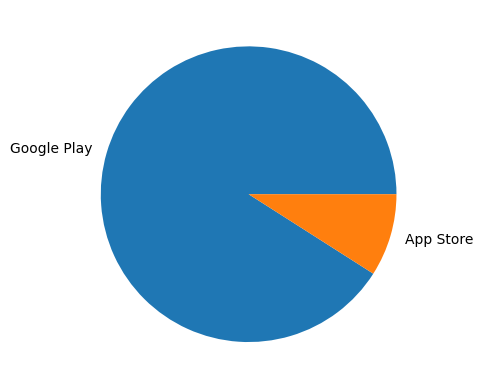

In [64]:
# Let's check the different Source of review

print(df['source'].value_counts())
plt.pie(df['source'].value_counts(), labels=df['source'].unique())
plt.show()



*   Large number of reviews and ratings are from Andriod users



5    12363
1     9422
4     3039
3     2537
2     1788
Name: rating, dtype: int64


<Axes: >

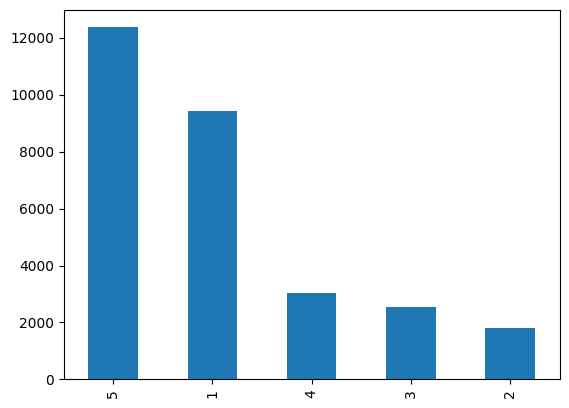

In [65]:
# Distribution of ratings


print(df['rating'].value_counts())
df['rating'].value_counts().plot(kind='bar')

* Most users rated 5 follwed by 1
* Also the classification is imbalanced.

In [66]:
# Let's check the rating with Andriod and IOS users

Google=df[df['source']=='Google Play']
Apple=df[df['source']=='App Store']

5    11626
1     8394
4     2739
3     2194
2     1563
Name: rating, dtype: int64


<Axes: >

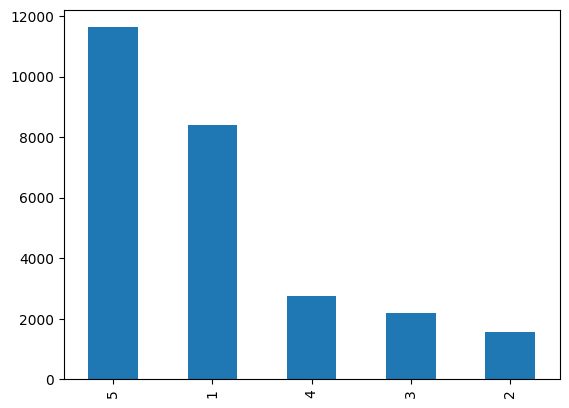

In [67]:
# Rating provided by Andriod Users

print(Google['rating'].value_counts())
Google['rating'].value_counts().plot(kind='bar')

1    1028
5     737
3     343
4     300
2     225
Name: rating, dtype: int64


<Axes: >

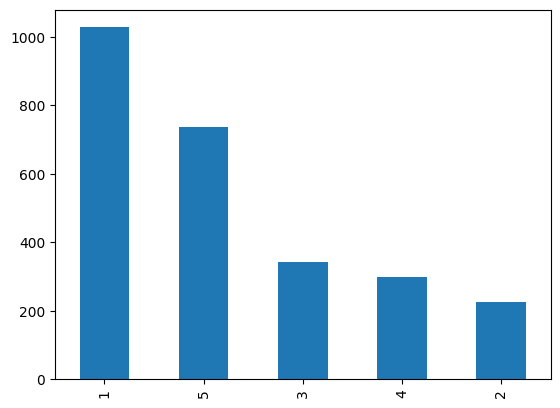

In [68]:
# Rating provided by IOS Users

print(Apple['rating'].value_counts())
Apple['rating'].value_counts().plot(kind='bar')


* By the above two plots it's clearly visible that IOS users rated 1 as the most while Andriod users rated 5.

* Difference in sentiment of Users.

* Will be creating 3 new variables which represents the number of characters, number of words and number of sentences for each review.

In [69]:
# New Variables:

df['num_characters']=df['review_description'].apply(len)
df['num_words']=df['review_description'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['review_description'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,source,review_description,rating,review_date,num_characters,num_words,num_sentences
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08,465,94,7
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19,475,91,3
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06,497,106,7
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10,487,108,6
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06,426,91,5


source
App Store      185.272693
Google Play     62.250038
Name: num_characters, dtype: float64


<Axes: xlabel='source'>

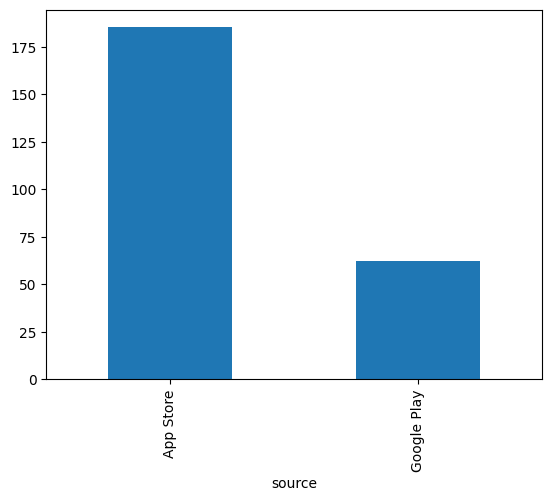

In [70]:
# The Average number of characters usage between different Users.

Review_len=df.groupby(by='source')['num_characters'].mean()
print(Review_len)
Review_len.plot(kind='bar')

* Significant difference in both the users.


source
App Store      40.180403
Google Play    13.084892
Name: num_words, dtype: float64


<Axes: xlabel='source'>

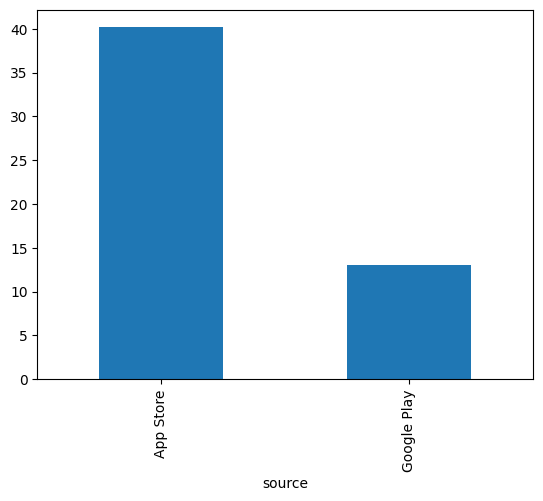

In [71]:
# The Average number of words usage between different Users.

Review_words=df.groupby(by='source')['num_words'].mean()
print(Review_words)
Review_words.plot(kind='bar')

* IOS users typically used 40 avg words compared to 13 avg words by Andriod users.

source
App Store      2.630839
Google Play    1.410281
Name: num_sentences, dtype: float64


<Axes: xlabel='source'>

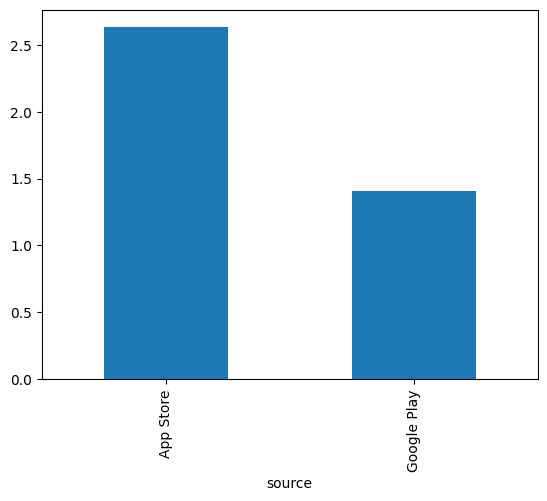

In [72]:
# The Average number of sentences usage between different Users.

Review_sent=df.groupby(by='source')['num_sentences'].mean()
print(Review_sent)
Review_sent.plot(kind='bar')

* Difference in usage of sentences.

Let's check the Highest and Lowest rating statistics.

In [73]:
df[df['rating']==1][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,9422.000000,9422.000000,9422.000000
mean,83.414137,17.599979,1.646996
std,102.697749,21.773680,1.326208
min,1.000000,1.000000,1.000000
25%,20.000000,4.000000,1.000000
50%,48.000000,10.000000,1.000000
75%,108.000000,23.000000,2.000000
max,1432.000000,292.000000,21.000000


In [74]:
df[df['rating']==5][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,12363.000000,12363.000000,12363.000000
mean,43.030252,9.059209,1.239262
std,64.160020,13.312531,0.747874
min,1.000000,1.000000,1.000000
25%,11.000000,2.000000,1.000000
50%,21.000000,4.000000,1.000000
75%,47.000000,10.000000,1.000000
max,921.000000,173.000000,11.000000


* Significant difference in the avg usage of characters and words used for high and low rated reviews.

<Axes: >

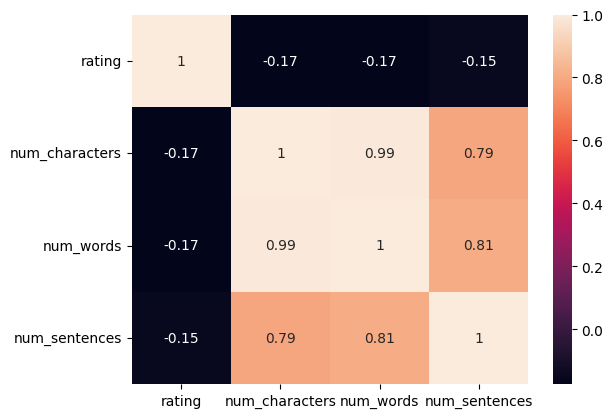

In [75]:
# Correlation figure.

sns.heatmap(df.corr(), annot=True)

* No Significant correlation between target variable with remaining variables.

* Multi-Colinearity between the independent variables. So may drop these before modelling.

* Date wise change in number of ratings.

In [76]:
day_count=df.groupby(df['review_date']).sum()
day_count=day_count.sort_values(by='rating', ascending=False)
print('No of Ratings for each day', '\n', day_count[['rating']])

No of Ratings for each day 
              rating
review_date        
2023-07-06    36425
2023-07-07    20705
2023-07-08     9564
2023-07-09     5715
2023-07-10     3720
2023-07-11     2908
2023-07-12     2319
2023-07-13     1837
2023-07-14     1530
2023-07-05     1455
2023-07-15     1231
2023-07-16      957
2023-07-24      893
2023-07-18      800
2023-07-22      781
2023-07-17      767
2023-07-19      762
2023-07-23      737
2023-07-21      651
2023-07-20      546
2023-07-25      277


* Gradual decrease in the number of rating with each day passing.

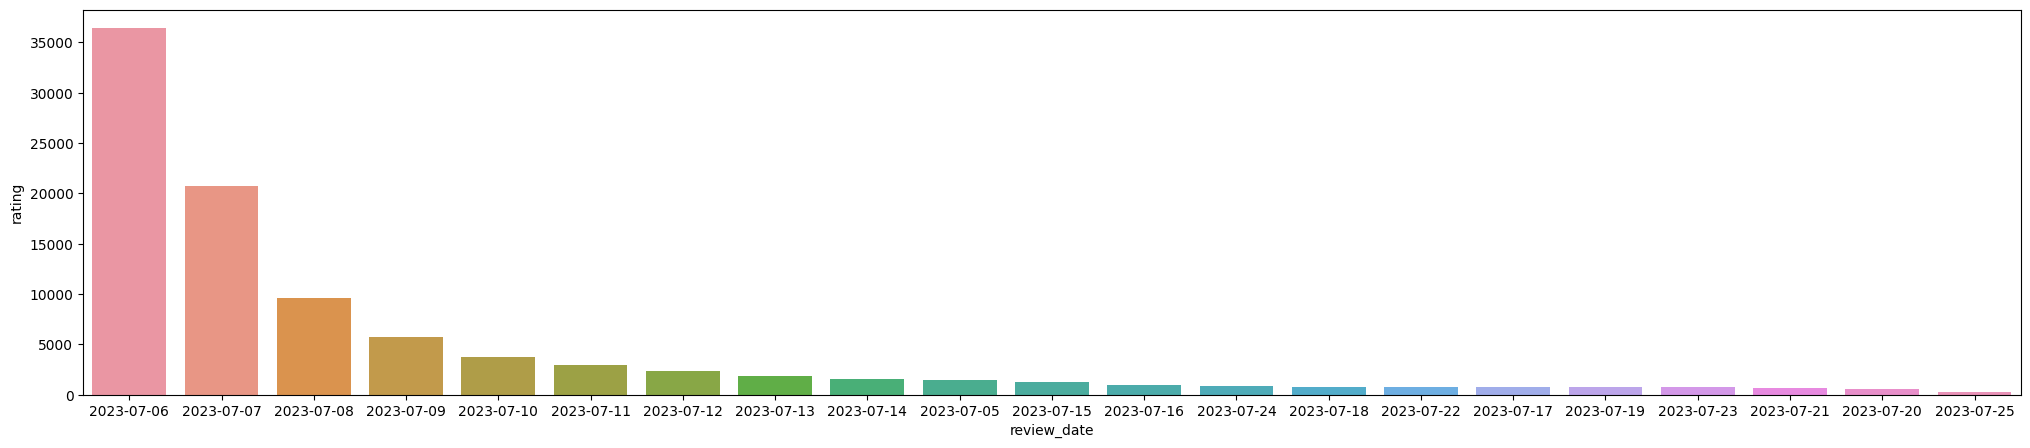

In [77]:
# Visualize the figure.

plt.figure(figsize=(25,5))
sns.barplot(x=day_count.index, y=day_count['rating'])
plt.show()

* Reducing the rating classification from 5 to 3 classes.

In [78]:
df['rating']=df['rating'].map({1:0,2:0,3:1,4:2,5:2})
df.head()

,source,review_description,rating,review_date,num_characters,num_words,num_sentences
0,Google Play,Meh. Not the greatest experience on a Chromebo...,0,2023-07-08,465,94,7
1,Google Play,Pretty good for a first launch!! Its easy to u...,1,2023-07-19,475,91,3
2,Google Play,"For a brand new app, it's very well optimized....",1,2023-07-06,497,106,7
3,Google Play,"Great app with a lot of potential! However, th...",1,2023-07-10,487,108,6
4,Google Play,"The app is good, but it needs a lot of functio...",1,2023-07-06,426,91,5


In [79]:
df['rating'].value_counts()

2    15402
0    11210
1     2537
Name: rating, dtype: int64

* Values of new classification rating.
* Classes are Imbalanced.

<Axes: >

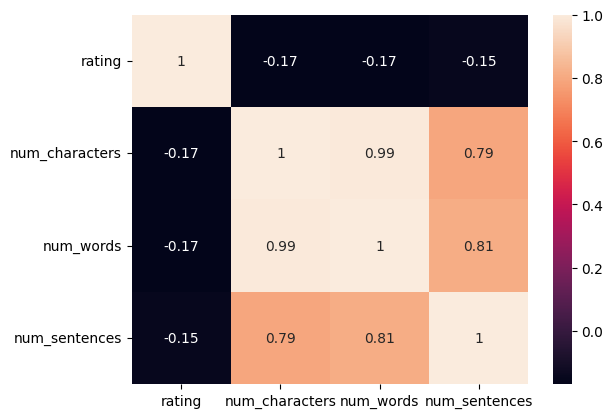

In [80]:
# Corr for New rating values.

sns.heatmap(df.corr(), annot=True)

* Dropping the unimportatnt features.

In [81]:
df=df.drop(['source', 'review_date', 'num_characters', 'num_sentences', 'num_words'], axis=1)

In [82]:
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,0
1,Pretty good for a first launch!! Its easy to u...,1
2,"For a brand new app, it's very well optimized....",1
3,"Great app with a lot of potential! However, th...",1
4,"The app is good, but it needs a lot of functio...",1


* Dataset looks fine.

# Text Pre-processing








Steps followed:


*   Removing all special characters other than Alpha numeric values.
*   Converting to lower sentences.
*   Tokenize the each document into words.
*   Applying stopwords follwed by Stemming.



In [83]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps=PorterStemmer()

corpus=[]

for i in range(len(df)):
  rp=re.sub('[^a-zA-Z]', ' ', df['review_description'][i])
  rp=rp.lower()
  rp=nltk.word_tokenize(rp)
  rp=[ps.stem(word) for word in rp if not word in set(stopwords.words('english'))]
  rp=" ".join(rp)
  corpus.append(rp)

In [84]:
# Each document is split into words
df['Corpus']=corpus

In [90]:
df.head()

,review_description,rating,Corpus
0,Meh. Not the greatest experience on a Chromebo...,0,meh greatest experi chromebook seem custom pho...
1,Pretty good for a first launch!! Its easy to u...,1,pretti good first launch easi use self explana...
2,"For a brand new app, it's very well optimized....",1,brand new app well optim howev miss quit featu...
3,"Great app with a lot of potential! However, th...",1,great app lot potenti howev lot need fix examp...
4,"The app is good, but it needs a lot of functio...",1,app good need lot function exampl search topic...


# Word Cloud

In [91]:
from wordcloud import WordCloud
wc= WordCloud(width=3000, height=1500, min_font_size=10, background_color='white')

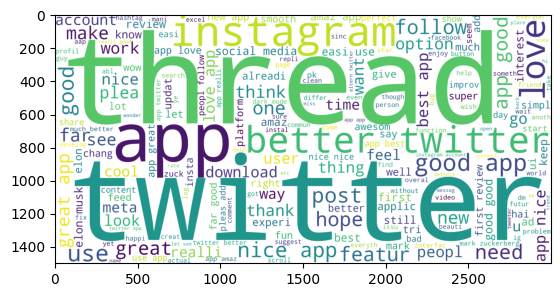

In [92]:
positive= wc.generate(df[df['rating']==2]['Corpus'].str.cat(sep=' '))
plt.imshow(positive)

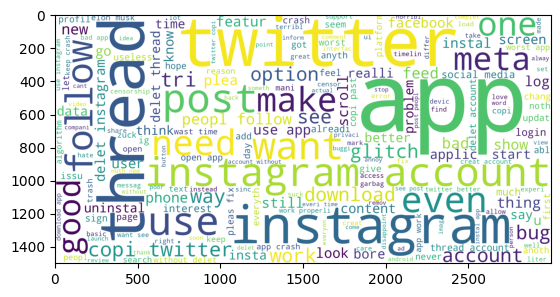

In [93]:
neg= wc.generate(df[df['rating']==-0]['Corpus'].str.cat(sep=' '))
plt.imshow(neg)

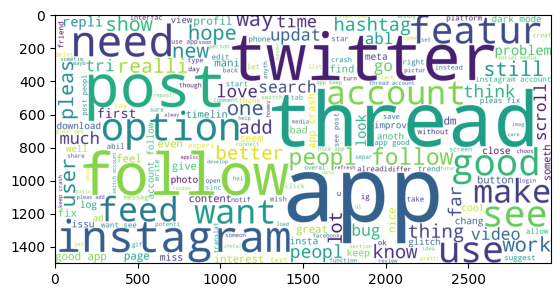

In [94]:
neutral= wc.generate(df[df['rating']==1]['Corpus'].str.cat(sep=' '))
plt.imshow(neutral)

# Text Vectorization

*   TF-IDF vectorization method is used.



In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(corpus).toarray()
print('Shape of Input data:', x.shape)

Shape of Input data: (29149, 12390)


In [96]:
#Dependent Variable

y=df['rating']


# Train-Test-Split

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=20)

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# MODELLING AND EVALUATION

*   Alogorithm used is Naive Bayes Classifier



In [101]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

model=MultinomialNB()
model.fit(x_train, y_train)

ypred_test=model.predict(x_test)

ypred_train=model.predict(x_train)

print('Train:', accuracy_score(y_train, ypred_train))
print('Test:', accuracy_score(y_test, ypred_test))

print('CV:', cross_val_score(model, x, y, cv=5).mean())

print(confusion_matrix(y_test, ypred_test))

print(classification_report(y_test, ypred_test))



Train: 0.8040224709464385
Test: 0.78147512864494
CV: 0.7571783596949894
[[1704    3  510]
 [ 255    0  263]
 [ 240    3 2852]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2217
           1       0.00      0.00      0.00       518
           2       0.79      0.92      0.85      3095

    accuracy                           0.78      5830
   macro avg       0.52      0.56      0.54      5830
weighted avg       0.71      0.78      0.74      5830

